In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import torch
from LinearRegression import LinearRegression
plt.style.use("dark_background")

In [2]:
X,y=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1234)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

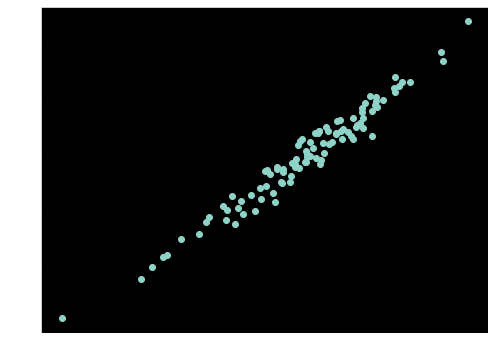

In [3]:
fig=plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y)
plt.show()

In [4]:
X_train

array([[ 3.61419367e-02],
       [ 9.84919842e-01],
       [ 1.82891913e-02],
       [-1.22091575e-01],
       [ 2.15268581e-01],
       [-1.19097569e+00],
       [-3.12651896e-01],
       [ 5.65738306e-01],
       [ 2.00784295e+00],
       [ 3.07968855e-01],
       [ 1.15003572e+00],
       [ 1.39198619e+00],
       [-2.02646325e-01],
       [ 1.64529543e-01],
       [-9.74236334e-01],
       [ 3.95126867e-02],
       [ 6.31979446e-01],
       [ 1.04593826e+00],
       [ 2.11883387e-01],
       [-3.56351666e+00],
       [ 7.67368736e-01],
       [ 1.43270697e+00],
       [ 1.93421376e-01],
       [ 1.05896919e+00],
       [-2.40045363e+00],
       [-5.48242449e-01],
       [ 2.39096052e+00],
       [ 1.56963721e-02],
       [-2.08498763e-01],
       [ 4.05453412e-01],
       [-1.44619508e-01],
       [-2.02125482e+00],
       [-3.99964581e-01],
       [ 8.63717292e-01],
       [ 3.54020332e-01],
       [-8.19470518e-02],
       [ 5.23507968e-01],
       [-4.69305285e-01],
       [-5.1

In [5]:
X_train.shape,y_train.shape

((80, 1), (80,))

### Fit function:

In [6]:
n_samples,n_features=X_train.shape
print(n_samples,n_features)

80 1


In [7]:
X_train_cols=X_train.reshape(80,)
X_train_cols

array([ 3.61419367e-02,  9.84919842e-01,  1.82891913e-02, -1.22091575e-01,
        2.15268581e-01, -1.19097569e+00, -3.12651896e-01,  5.65738306e-01,
        2.00784295e+00,  3.07968855e-01,  1.15003572e+00,  1.39198619e+00,
       -2.02646325e-01,  1.64529543e-01, -9.74236334e-01,  3.95126867e-02,
        6.31979446e-01,  1.04593826e+00,  2.11883387e-01, -3.56351666e+00,
        7.67368736e-01,  1.43270697e+00,  1.93421376e-01,  1.05896919e+00,
       -2.40045363e+00, -5.48242449e-01,  2.39096052e+00,  1.56963721e-02,
       -2.08498763e-01,  4.05453412e-01, -1.44619508e-01, -2.02125482e+00,
       -3.99964581e-01,  8.63717292e-01,  3.54020332e-01, -8.19470518e-02,
        5.23507968e-01, -4.69305285e-01, -5.11881309e-01, -1.54690555e+00,
        1.54565880e+00,  1.31815155e+00, -5.66445930e-01,  2.03060362e+00,
       -3.97840228e-01, -5.84718211e-01, -1.00918200e-01,  2.11836468e-03,
        1.52630552e-01,  2.70835849e-01, -2.07497760e+00, -7.85435212e-01,
       -1.81702723e+00, -

In [8]:
X_train_rows=X_train

In [9]:
bias=0
var1=1/n_samples
n_iters=1000
lr=0.01
# weights as scalars:
w_a1=0
weights=[w_a1]
weights=np.array(weights)

#### First iteration of establishing bias and weight values:

##### y_pred = np.dot(X, self.weights) + self.bias

calculating np.dot(X,self.weights):

In [10]:
dot_prod=X_train_cols*w_a1
dot_prod

array([ 0.,  0.,  0., -0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0., -0.,
        0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0., -0.,
        0.,  0., -0.,  0., -0., -0., -0.,  0.,  0., -0.,  0., -0., -0.,
       -0.,  0.,  0., -0.,  0., -0., -0., -0.,  0.,  0.,  0., -0., -0.,
       -0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0., -0., -0.,  0., -0.,
       -0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0., -0.,  0., -0.,
        0., -0.])

In [11]:
bias_counts=[bias]*n_samples
bias_counts=np.array(bias_counts)
bias_counts

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
y_pred=dot_prod+bias_counts
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

res=y_pred-y_train

In [13]:
int_var=y_train*(-1)
int_var

array([  -4.72571035,  -37.3033147 ,   -9.84617977,    4.74696202,
        -46.61433976,   88.5636594 ,   23.05085118,  -49.30980232,
       -187.11855381,  -52.7868072 , -100.63781242, -126.59136522,
         34.92302734,    2.39500665,   91.54741375,    1.32075177,
        -44.66438206, -107.23095944,  -45.28549362,  289.12699629,
        -57.29982392, -132.7901884 ,  -41.80672108,  -88.76973989,
        218.53325548,   24.66035565, -241.89951823,   10.13240956,
         46.42718117,  -25.64618465,   13.50142554,  176.72441073,
         18.66943338,  -50.5672884 ,  -22.64343207,   21.09022538,
        -64.92081242,   64.87115989,   31.48631679,  138.96811403,
       -133.52911687, -122.17927892,   53.50531413, -171.25986261,
         21.98254439,   26.36081393,  -20.50476935,   10.68145433,
        -42.95199809,  -24.1455885 ,  179.69097653,   69.72153699,
        147.48591272,   96.71683373,  -37.07750059,  -68.80268857,
         18.61172071,  -79.62314161,  -52.56456985,  -28.51154

In [14]:
res=y_pred+int_var
res

array([  -4.72571035,  -37.3033147 ,   -9.84617977,    4.74696202,
        -46.61433976,   88.5636594 ,   23.05085118,  -49.30980232,
       -187.11855381,  -52.7868072 , -100.63781242, -126.59136522,
         34.92302734,    2.39500665,   91.54741375,    1.32075177,
        -44.66438206, -107.23095944,  -45.28549362,  289.12699629,
        -57.29982392, -132.7901884 ,  -41.80672108,  -88.76973989,
        218.53325548,   24.66035565, -241.89951823,   10.13240956,
         46.42718117,  -25.64618465,   13.50142554,  176.72441073,
         18.66943338,  -50.5672884 ,  -22.64343207,   21.09022538,
        -64.92081242,   64.87115989,   31.48631679,  138.96811403,
       -133.52911687, -122.17927892,   53.50531413, -171.25986261,
         21.98254439,   26.36081393,  -20.50476935,   10.68145433,
        -42.95199809,  -24.1455885 ,  179.69097653,   69.72153699,
        147.48591272,   96.71683373,  -37.07750059,  -68.80268857,
         18.61172071,  -79.62314161,  -52.56456985,  -28.51154

In [15]:
res_sum=res.sum()
res_sum

-182.82934447510522

calculating np.dot(X_train_cols,res)

In [16]:
X_train_cols.shape

(80,)

In [17]:
X_train_rows.shape

(80, 1)

In [18]:
p=[]
for i,j in zip(X_train,res):
    k=i*j
    p.append(k)

In [19]:
p

[array([-0.17079632]),
 array([-36.74077481]),
 array([-0.18007867]),
 array([-0.57956407]),
 array([-10.03460277]),
 array([-105.47716578]),
 array([-7.20689233]),
 array([-27.89644404]),
 array([-375.70466923]),
 array([-16.25669258]),
 array([-115.73707954]),
 array([-176.21343259]),
 array([-7.07702314]),
 array([0.39404935]),
 array([-89.18881674]),
 array([0.05218645]),
 array([-28.22697142]),
 array([-112.15696266]),
 array([-9.59524376]),
 array([-1030.30886832]),
 array([-43.97009344]),
 array([-190.24942826]),
 array([-8.08631354]),
 array([-94.00441933]),
 array([-524.57894723]),
 array([-13.51985378]),
 array([-578.37219679]),
 array([0.15904207]),
 array([-9.68000985]),
 array([-10.39833306]),
 array([-1.95256952]),
 array([-357.20506704]),
 array([-7.46711209]),
 array([-43.67584139]),
 array([-8.01623534]),
 array([-1.72828179]),
 array([-33.98656258]),
 array([-30.44437816]),
 array([-16.11725706]),
 array([-214.97054731]),
 array([-206.39045516]),
 array([-161.05080639

In [20]:
type(p[0])

numpy.ndarray

In [21]:
summation=np.array([0])
for m in p:
    summation=summation+m

summation

array([-7245.81290926])

calculating weights:

In [22]:
dw=var1*summation
dw

array([-90.57266137])

In [23]:
dw=dw*lr

In [24]:
weights=weights+(dw*(-1))
weights

array([0.90572661])

calculating bias:

In [26]:
db=res_sum*var1*lr
bias=bias+(-1*db)
bias

0.022853668059388155

In [27]:
bias,weights

(0.022853668059388155, array([0.90572661]))